In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#library to split the data
from sklearn.model_selection import train_test_split

In [3]:
#importing libraries for linear regression 
# OLS Method
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as ols

In [4]:

#importing library for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer

In [5]:
#libraries for scaling 
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#importing metrics libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [6]:
#importing dataframe 
df_compensation=pd.read_csv("employee_compensation.csv")
df_compensation.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [7]:
#checking for year 
df_compensation.Year_Type.value_counts()



Fiscal      28665
Calendar    21335
Name: Year_Type, dtype: int64

In [8]:

#checking for year 
df_compensation.Year.value_counts()


2015    14699
2014    14155
2013    13605
2016     7541
Name: Year, dtype: int64

In [9]:
#changing to object
df_compensation['Year'] = df_compensation['Year'].astype(object)

In [10]:
#remove insignificant variables
df_compensation = df_compensation.drop('Employee_Identifier',axis=1)

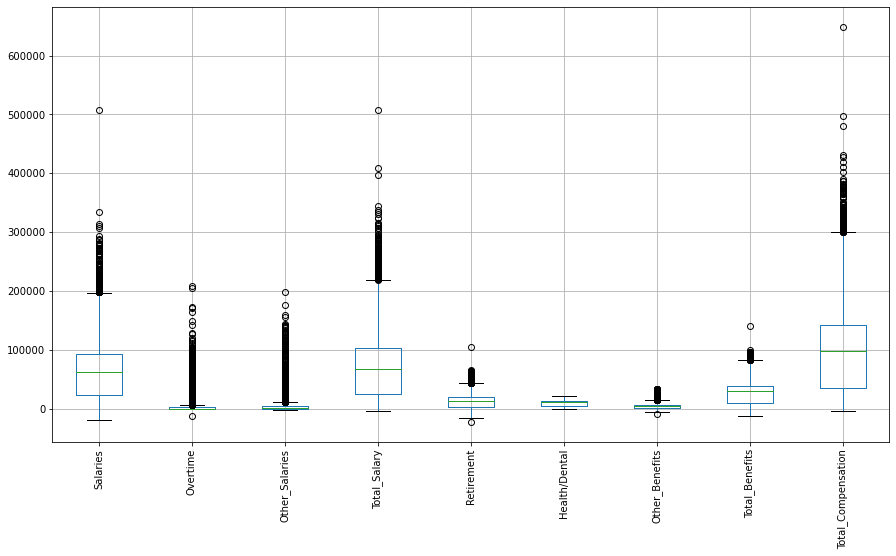

In [11]:
#outlier treatment
plt.figure(figsize = (15,8))
df_compensation.boxplot()
plt.xticks(rotation=90);

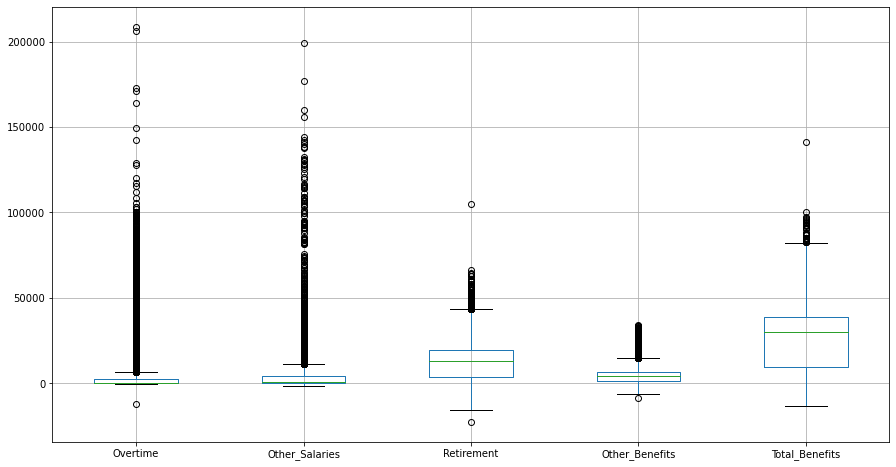

In [12]:
plt.figure(figsize = (15,8))
df_compensation.loc[:,['Overtime', 'Other_Salaries', 'Retirement', 'Other_Benefits', 'Total_Benefits']].boxplot();

In [13]:
# calculate the first quartile
Q1 = df_compensation.quantile(0.25)
# calculate the third quartile
Q3 = df_compensation.quantile(0.75)
# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_compensation = df_compensation[~((df_compensation < (Q1 - 1.5 * IQR)) | (df_compensation > (Q3 + 1.5 * IQR))).any(axis=1)]
# check the shape of the data
df_compensation.shape

(37721, 11)

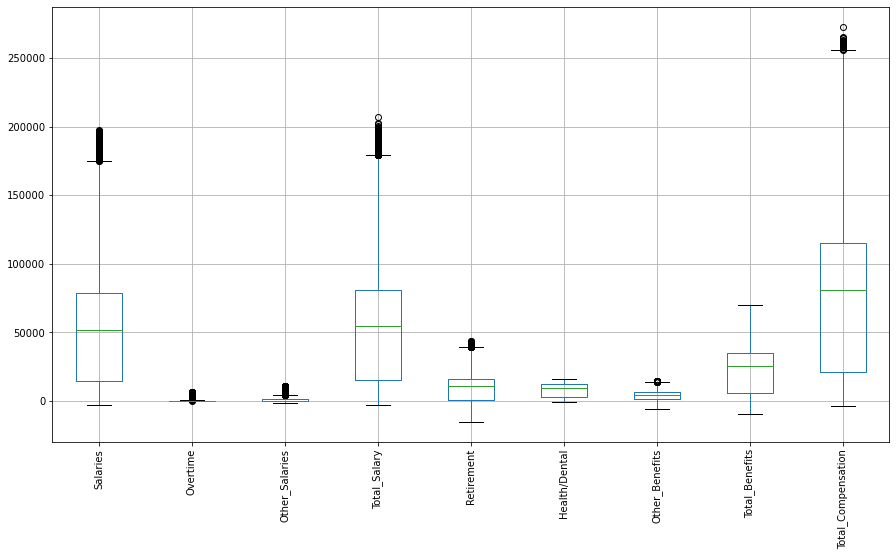

In [14]:
#plot after outlier treatment 
plt.figure(figsize = (15,8))
df_compensation.boxplot()
plt.xticks(rotation=90);

In [15]:
# Feature Scaling
ss=StandardScaler()
#using code
df_compensation.iloc[:, 2:11]=ss.fit_transform(df_compensation.iloc[:, 2:11])
df_compensation.iloc[:, 2:11].head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489
3,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309
4,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591
5,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551


In [16]:
# create dataframe of features by dropping the target variable
# 'axis = 1' drops the corresponding column(s)
df_feature = df_compensation.drop('Total_Compensation', axis = 1)

In [17]:
# create dataframe of target variable
df_target = df_compensation['Total_Compensation']

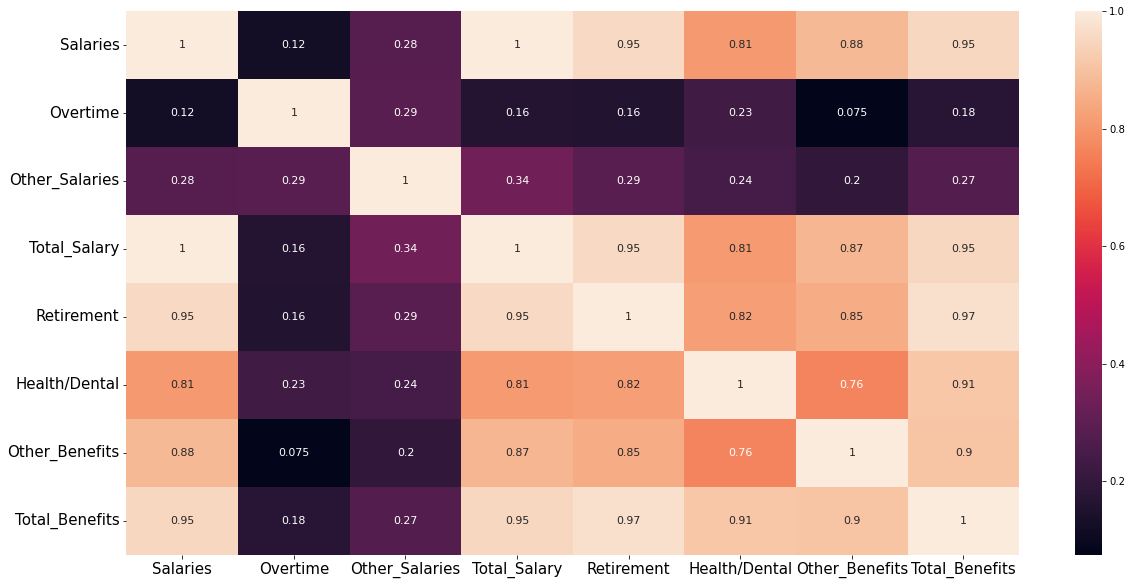

In [18]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (20,10))

# plot the heat map
# corr(): give the correlation matrix
# annot: prints the correlation values in the chart
# annot_kws: used to set the font size of the annotation
sns.heatmap(df_feature.corr(), annot = True, annot_kws = {"size": 11})

# rotation = 'horizontal' rotates the y-axis labels horizontally
# set text size using 'fontsize'
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)

# display the plot
plt.show()

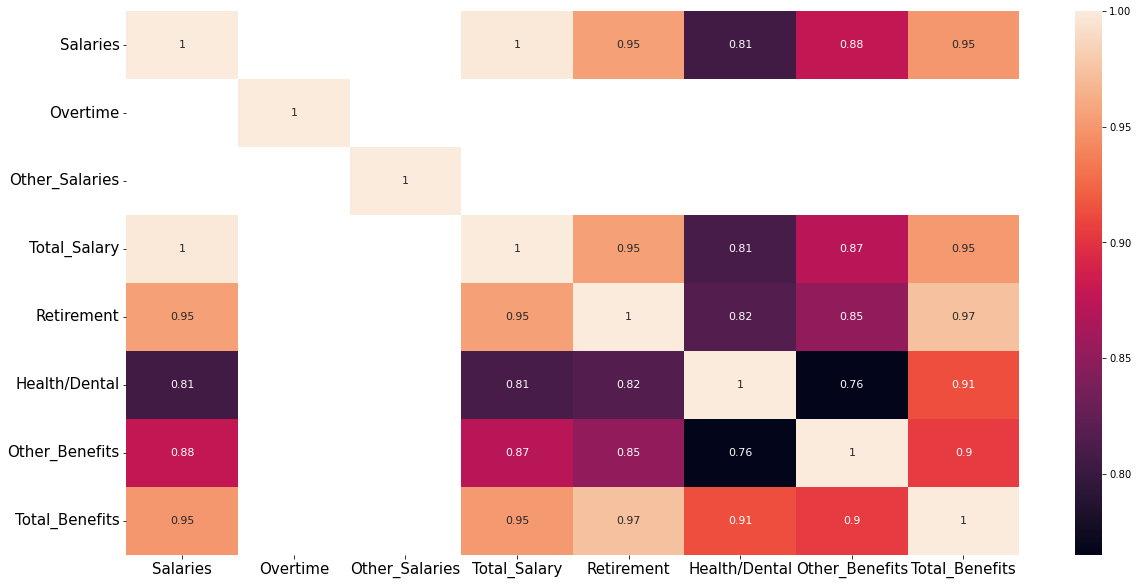

In [19]:
plt.figure(figsize = (20,10))
sns.heatmap(df_feature.corr()[np.abs(df_feature.corr()) > 0.6], annot = True, annot_kws = {"size": 11})
plt.yticks(rotation = 'horizontal', fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [20]:
df_feature = df_compensation.drop('Total_Compensation', axis = 1)

# create dataframe of target variable
df_target = df_compensation['Total_Compensation']

In [21]:
df_num = df_feature.select_dtypes(include=[np.number])
df_num.columns

Index(['Salaries', 'Overtime', 'Other_Salaries', 'Total_Salary', 'Retirement',
       'Health/Dental', 'Other_Benefits', 'Total_Benefits'],
      dtype='object')

In [22]:
df_cat = df_feature.select_dtypes(include=[np.object])
df_cat.columns


Index(['Year_Type', 'Year'], dtype='object')

In [23]:
#encoding categorical to numeric

In [24]:
encoded_data = pd.get_dummies(data = df_cat,drop_first = True)

In [25]:
encoded_data.head()

,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,1,0,1,0
1,0,0,1,0
3,1,1,0,0
4,1,0,0,0
5,0,0,0,0


In [26]:
df_compensation_dummy = pd.concat([df_num,encoded_data],axis = 1)

In [27]:
df_compensation_dummy.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1,0,1,0
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,0,0,1,0
3,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,1,1,0,0
4,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,1,0,0,0
5,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0,0,0,0


In [28]:
x=df_compensation_dummy.copy()
y=df_target.copy()
x = sm.add_constant(x)

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [30]:
print("x-train",xtrain.shape)
print("ytrain",ytrain.shape)
print("xtest",xtest.shape)
print("ytest",ytest.shape)

x-train (26404, 13)
ytrain (26404,)
xtest (11317, 13)
ytest (11317,)


In [31]:
MRL_full = sm.OLS(ytrain,xtrain).fit()

print(MRL_full.summary())

                            OLS Regression Results                            
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.925e+33
Date:                Thu, 22 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:36:18   Log-Likelihood:             8.7044e+05
No. Observations:               26404   AIC:                        -1.741e+06
Df Residuals:                   26393   BIC:                        -1.741e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -5.707e-16   1.59e-17  

In [32]:
y_pred_full = MRL_full.predict(xtest)

In [33]:
y_pred_full.head()

4315    -0.322981
37957   -1.345680
14742   -1.325096
38198    1.216575
15113    0.462056
dtype: float64

In [34]:
xtest.head(1)

,const,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Year_Type_Fiscal,Year_2014,Year_2015,Year_2016
4315,1.0,-0.195858,-0.428531,1.071778,-0.143833,-0.715964,-1.579754,0.577257,-0.778881,0,0,1,0


In [39]:
transpose_value = xtest.transpose()
x_trans_into_x = np.dot(transpose_value,xtest)
inverse_value = np.linalg.inv(x_trans_into_x)
inverse_intox_transpose = np.dot(inverse_value,transpose_value)
enter_into_y =np.dot(inverse_intox_transpose,ytest)
yy = enter_into_y


In [48]:
check = xtest.head(1)
check["Salaries"]

4315   -0.195858
Name: Salaries, dtype: float64

In [58]:
yy[12]

-6.713379852030243e-16

In [68]:
final = yy[0]+(yy[1]*(-0.195858))+(yy[2]*(-0.428531))+(yy[3]*(1.071778))+(yy[4]*(-0.143833))+(yy[5]*(-0.715964))+(yy[6]*(-1.579754))+(yy[7]*(0.577257))+(yy[8]*(-0.778881))+(yy[9]*(0))+(yy[10]*(0))+(yy[11]*(1))+(yy[12]*(0))

In [70]:
final

23721166.900393583